# Activation and Loss Function Exploration Exercise

## Background
This exercise aims to explore the effects of different activation and loss functions on a neural network's learning and performance. You will modify a simple neural network in TensorFlow to experiment with these functions.

## Activation Functions
Common activation functions include:

* Sigmoid
* ReLU (Rectified Linear Unit)
* Tanh (Hyperbolic Tangent)

## Loss Functions
Some standard loss functions are:

* Mean Squared Error (MSE) - typically used for regression tasks
* Binary Cross-Entropy - used for binary classification
* Categorical Cross-Entropy - used for multi-class classification

# Setup
First, let's import TensorFlow and other necessary libraries. Run the cell below to import them.


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


## Dataset Preparation
We'll use a synthetic dataset for binary classification. The 'make_moons' function from scikit-learn generates a two-moon dataset, which is ideal for this experiment.

In [14]:
data = make_moons(n_samples=1000, noise=0.1, random_state=0)
data = np.hstack((data[0], data[1].reshape(-1, 1)))
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, 2], test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 2) (200, 2) (800,) (200,)


In [15]:
# convert data to dataframe
import pandas as pd
data = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,2.042715,0.518124,1.0
1,1.720337,-0.132338,1.0
2,-0.263867,0.763826,0.0
3,-0.098035,0.180082,1.0
4,0.478476,-0.398778,1.0


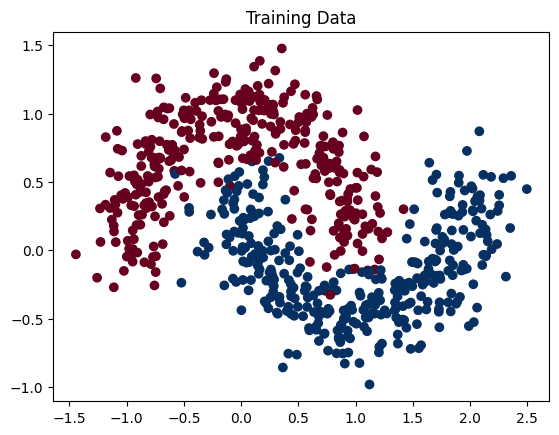

In [16]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu)
plt.title("Training Data")
plt.show()


## Model Building
Now, let's define a function to create a simple neural network model. You will modify this function later to experiment with different activation and loss functions.

In [17]:
def build_model(activation_function='relu', loss_function='binary_crossentropy'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation=activation_function, input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model


# Training and evaluating the model
Let's train the model and see how well it solves the problem.

keras has history dict that contains loss, accuracy, val_loss, val_accuracy

10/10 [==============================] - 0s 1ms/step


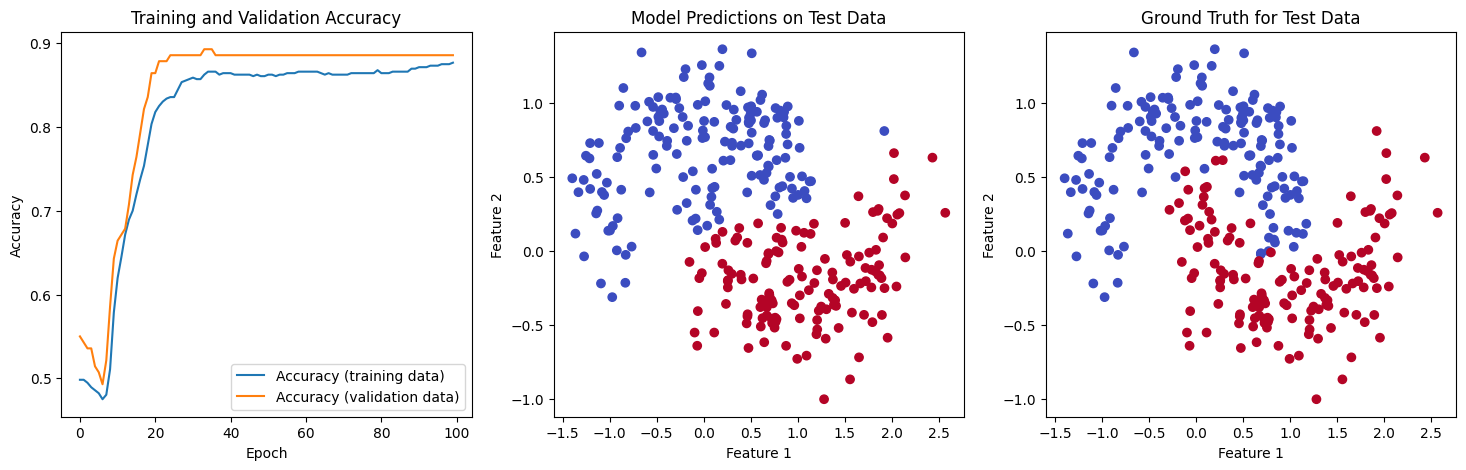

Test Loss: 0.2437
Test Accuracy: 0.9033


In [18]:
# Function to train, evaluate, and visualize model predictions along with ground truth
def train_and_evaluate_model(model, epochs=100):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)
    
    # Evaluating the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Plotting training history
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Accuracy (training data)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Predicting on test data
    predictions = model.predict(X_test) > 0.5

    # Plotting model predictions
    plt.subplot(1, 3, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0], cmap=plt.cm.coolwarm)
    plt.title('Model Predictions on Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plotting ground truth
    plt.subplot(1, 3, 3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.title('Ground Truth for Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.show()

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

# Example of using the function with a specific activation and loss function
model = build_model(activation_function='relu', loss_function='binary_crossentropy')
train_and_evaluate_model(model, epochs=100)


# Experimentation
## Task 1: Activation Functions
1. Experiment with different activation functions in the hidden layer. Replace activation_function in build_model with 'sigmoid', 'relu', and 'tanh'.
2. Train the model for each activation function and evaluate its performance on the test set.
3. Record your observations.
## Task 2: Loss Functions
1. Now, experiment with different loss functions. For binary classification, try 'binary_crossentropy' and 'mean_squared_error'.
2. Train and evaluate the model for each loss function.
3. Record your observations.

# Analysis and Questions
After completing the tasks, answer the following questions:

1. How did different activation functions affect the model's performance?
2. How did different loss functions impact the learning process and accuracy?
3. Which combination of activation and loss function provided the best results for this task?

# Conclusion
Summarize your findings and discuss why certain combinations might work better than others for this specific problem.

## Answers

### Task 1: Activation functions

In [25]:
# list of activation functions to try
activation_functions = ['relu', 'tanh', 'sigmoid']


10/10 [==============================] - 0s 1ms/step


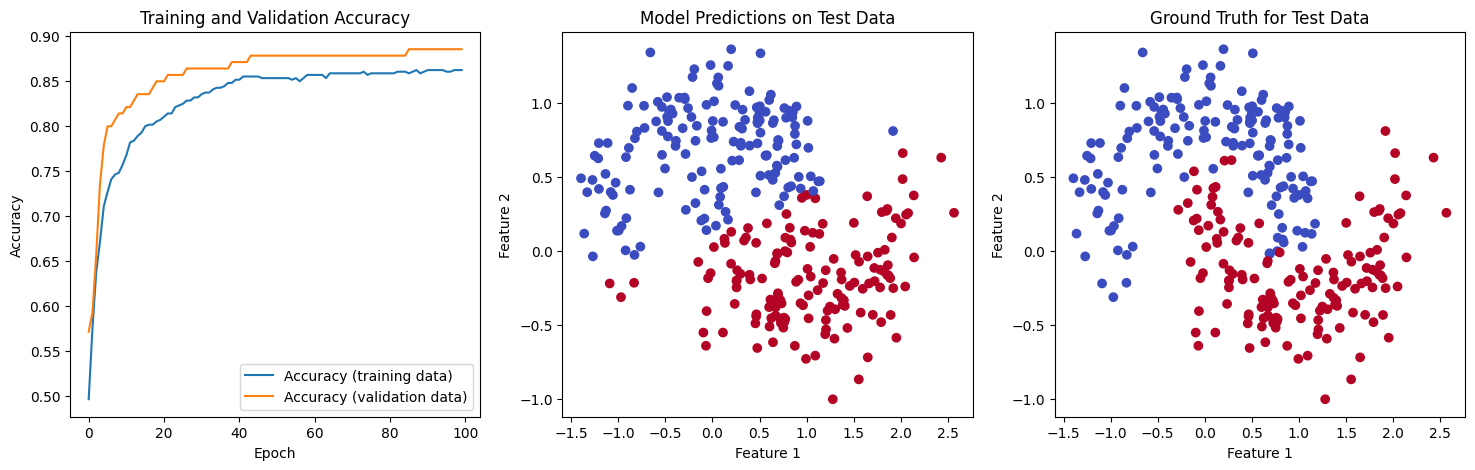

Test Loss: 0.2663
Test Accuracy: 0.8800


In [19]:
# Example of using the function with a different activation and loss function

model = build_model(activation_function='tanh', loss_function='binary_crossentropy')
train_and_evaluate_model(model, epochs=100)

10/10 [==============================] - 0s 1ms/step


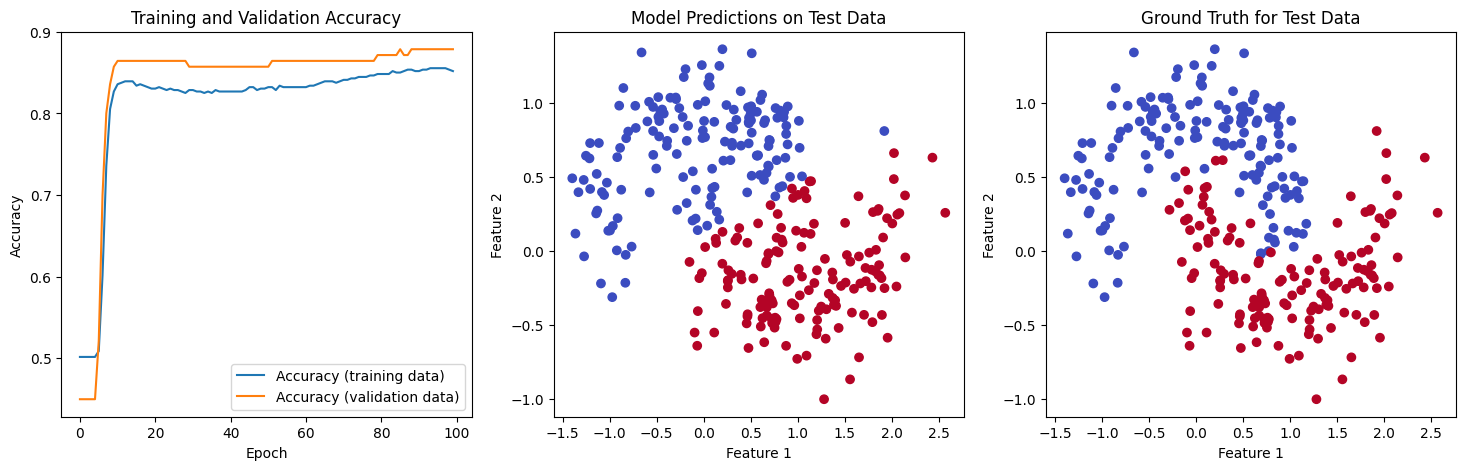

Test Loss: 0.2914
Test Accuracy: 0.8733


In [20]:
model = build_model(activation_function='sigmoid', loss_function='binary_crossentropy')
train_and_evaluate_model(model, epochs=100)


10/10 [==============================] - 0s 1ms/step


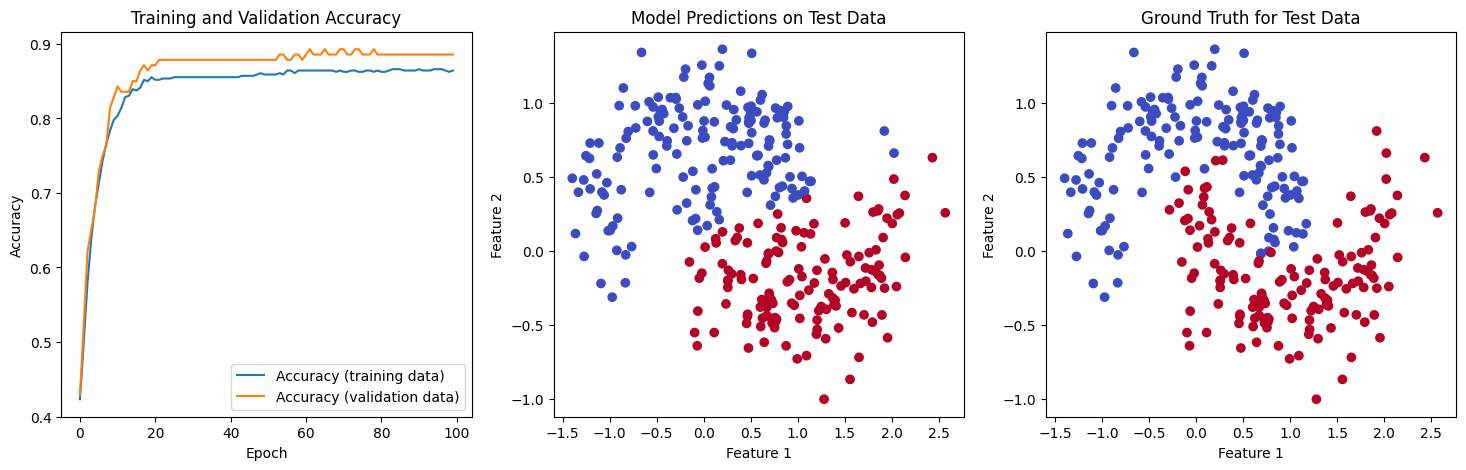

Test Loss: 0.2533
Test Accuracy: 0.8933


In [21]:
model = build_model(activation_function='relu', loss_function='binary_crossentropy')
train_and_evaluate_model(model, epochs=100)

### Observation

The test loss for the combination of relu and binary_crossentropy is slightly lower for that of sigmoid and tanh

### Task 2 

In [23]:
loss_functions = ['binary_crossentropy', 'mean_squared_error', 'mean_absolute_error', 'huber_loss']  

Activation Function: relu, Loss Function: binary_crossentropy
10/10 [==============================] - 0s 1ms/step


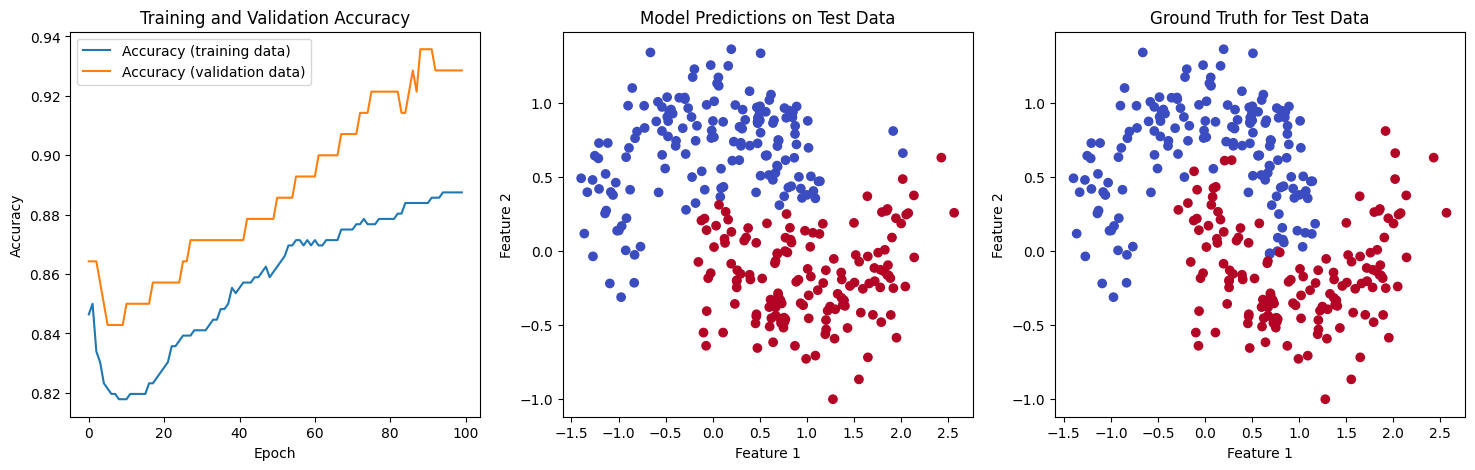

Test Loss: 0.2140
Test Accuracy: 0.9200



Activation Function: relu, Loss Function: mean_squared_error
10/10 [==============================] - 0s 1ms/step


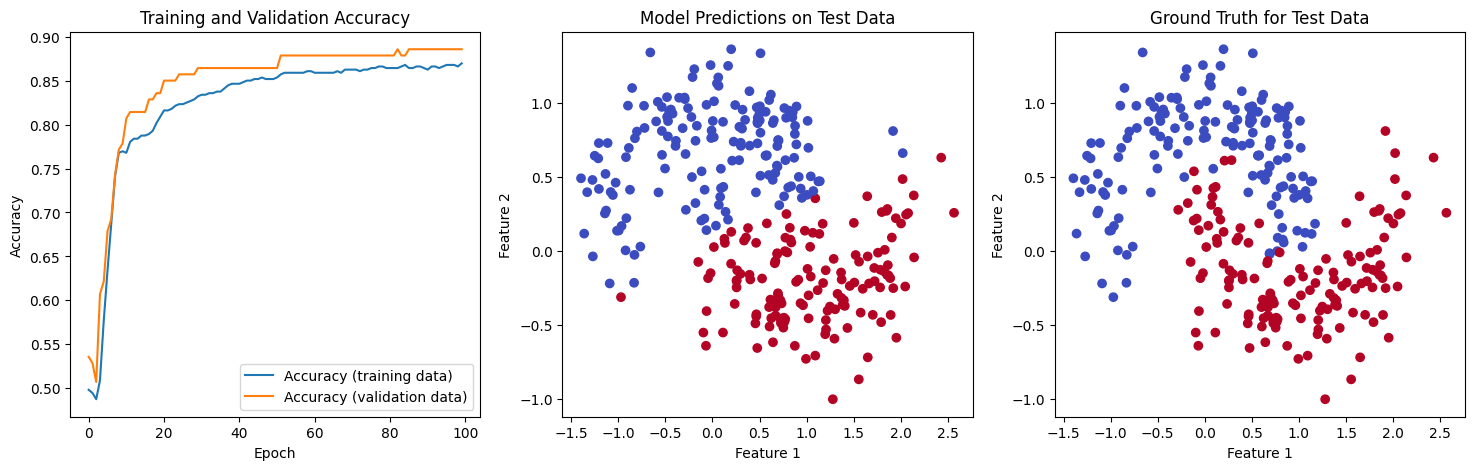

Test Loss: 0.0790
Test Accuracy: 0.8900



Activation Function: relu, Loss Function: mean_absolute_error
10/10 [==============================] - 0s 1ms/step


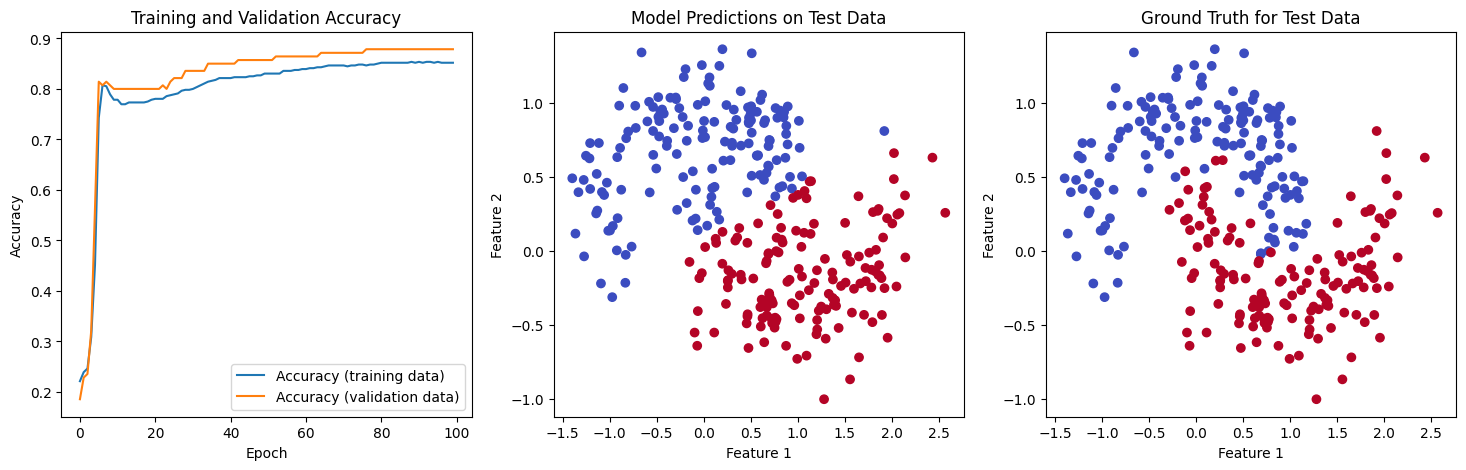

Test Loss: 0.1391
Test Accuracy: 0.8767



Activation Function: relu, Loss Function: huber_loss
10/10 [==============================] - 0s 1ms/step


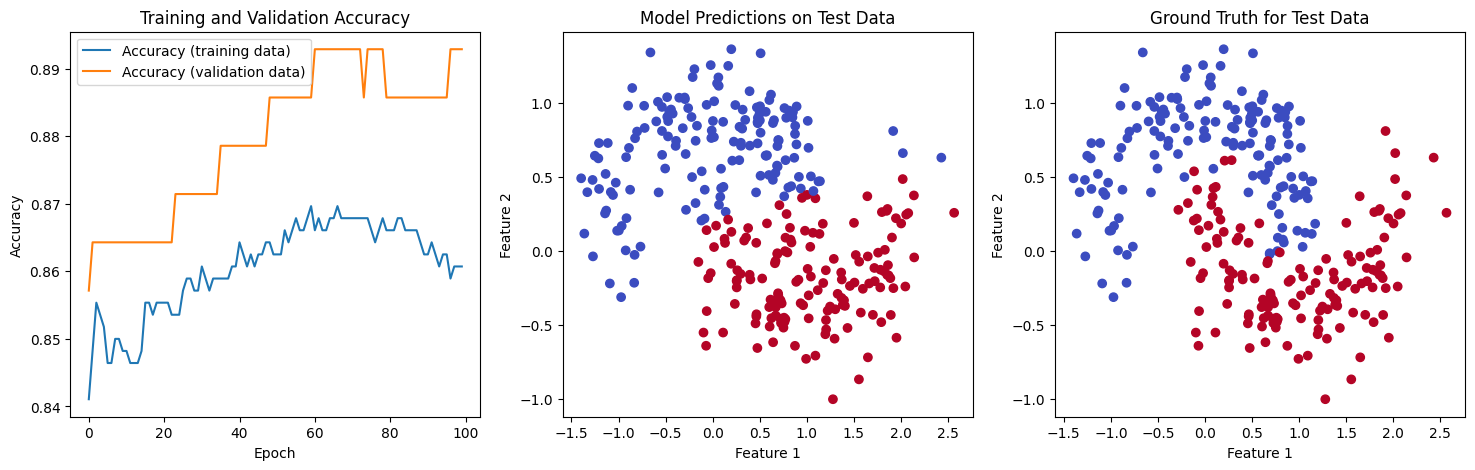

Test Loss: 0.0381
Test Accuracy: 0.8900



Activation Function: tanh, Loss Function: binary_crossentropy
10/10 [==============================] - 0s 1ms/step


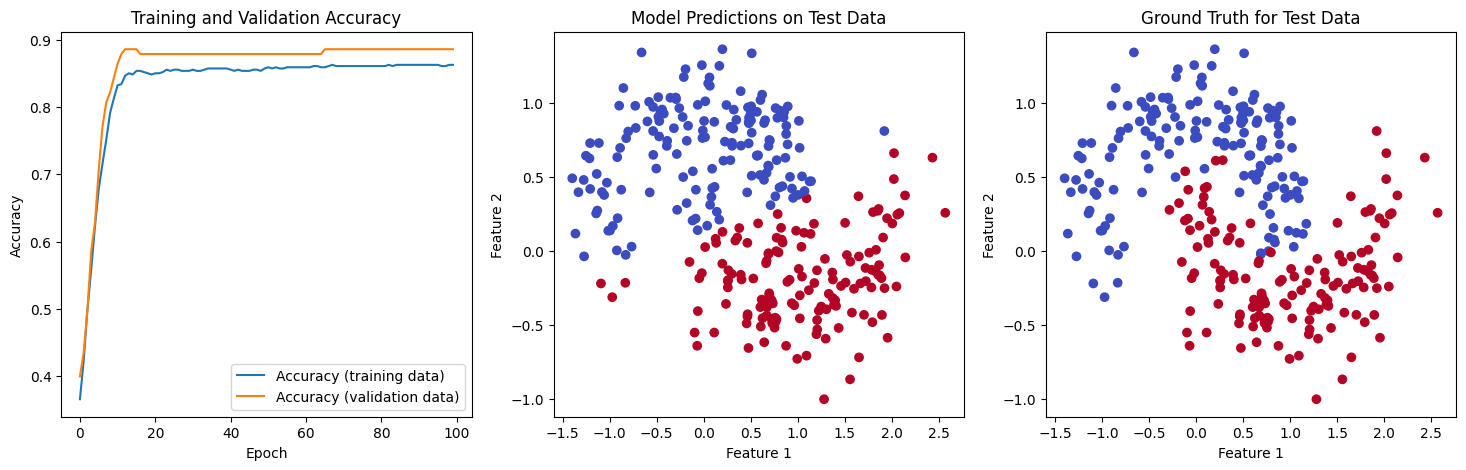

Test Loss: 0.2671
Test Accuracy: 0.8867



Activation Function: tanh, Loss Function: mean_squared_error
10/10 [==============================] - 0s 1ms/step


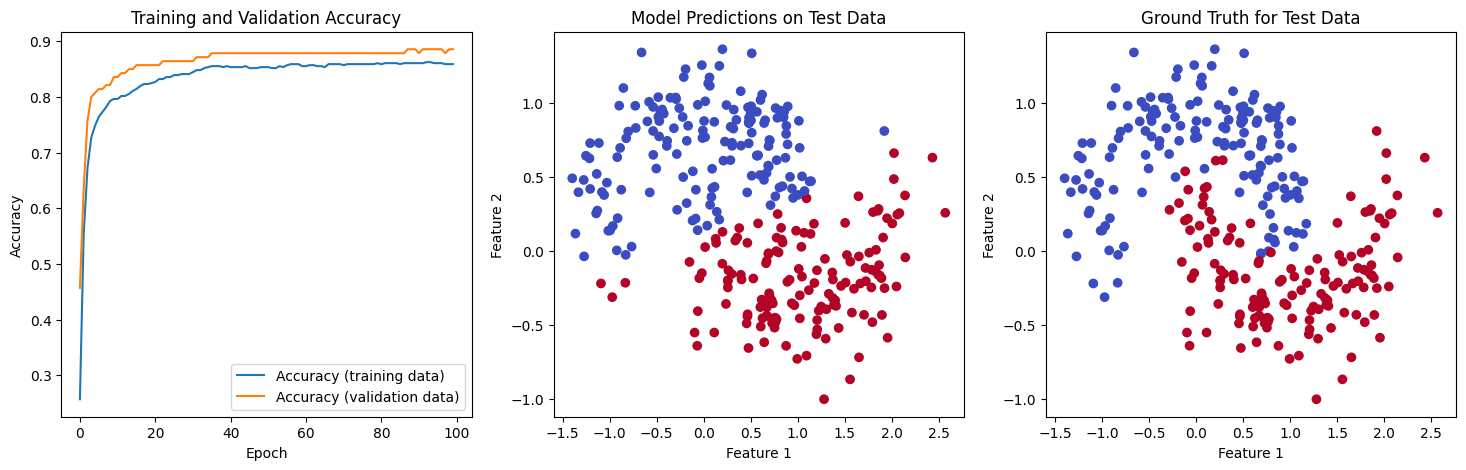

Test Loss: 0.0838
Test Accuracy: 0.8867



Activation Function: tanh, Loss Function: mean_absolute_error
10/10 [==============================] - 0s 1ms/step


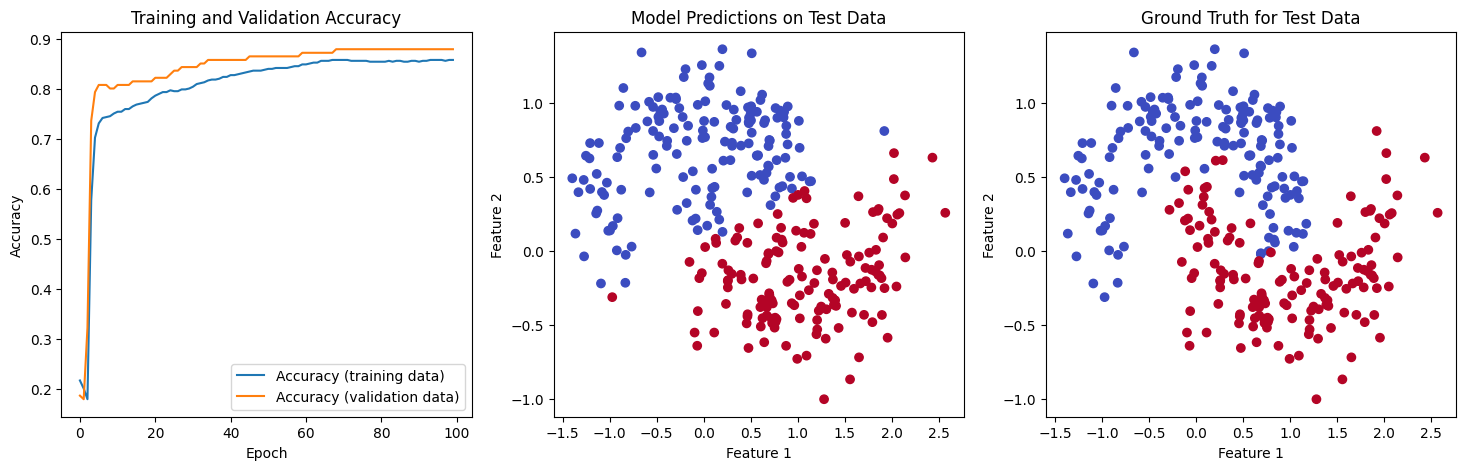

Test Loss: 0.1378
Test Accuracy: 0.8800



Activation Function: tanh, Loss Function: huber_loss
10/10 [==============================] - 0s 1ms/step


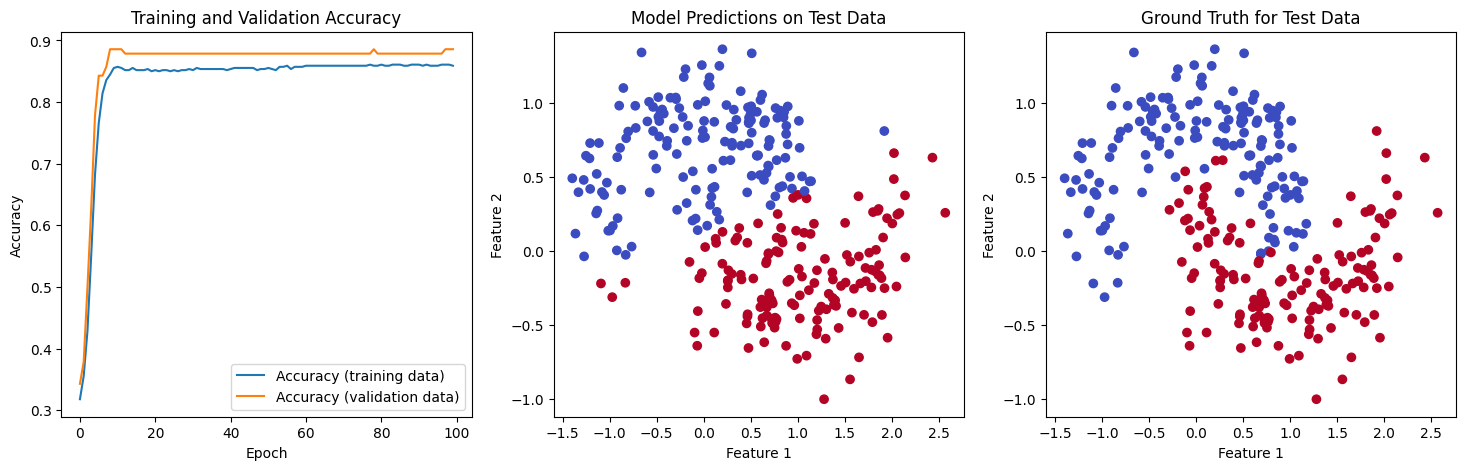

Test Loss: 0.0421
Test Accuracy: 0.8800



Activation Function: sigmoid, Loss Function: binary_crossentropy
10/10 [==============================] - 0s 1ms/step


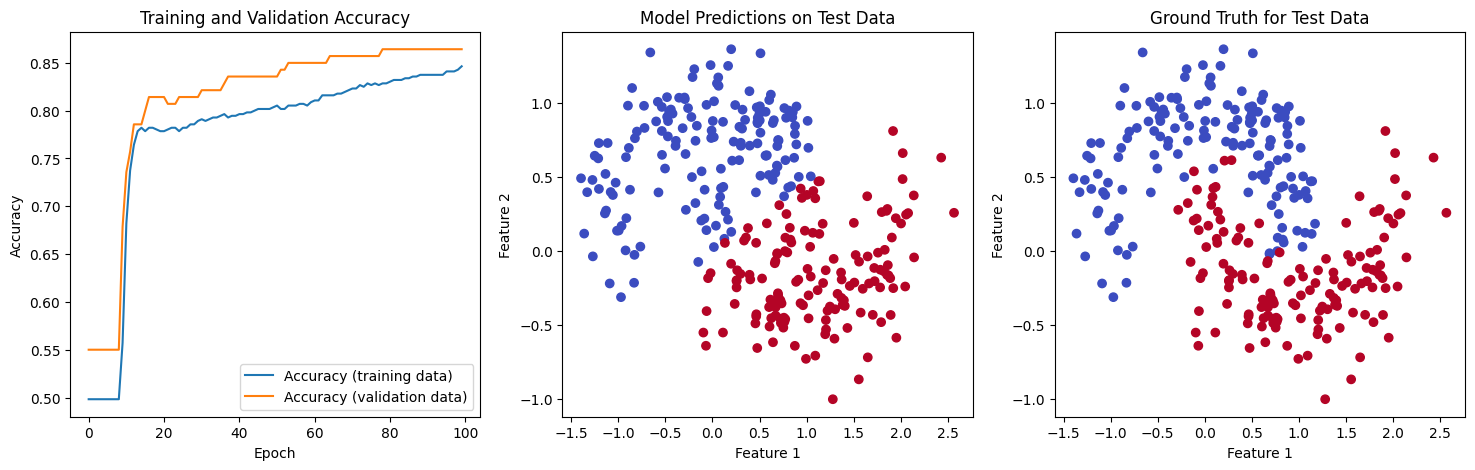

Test Loss: 0.3043
Test Accuracy: 0.8633



Activation Function: sigmoid, Loss Function: mean_squared_error
10/10 [==============================] - 0s 1ms/step


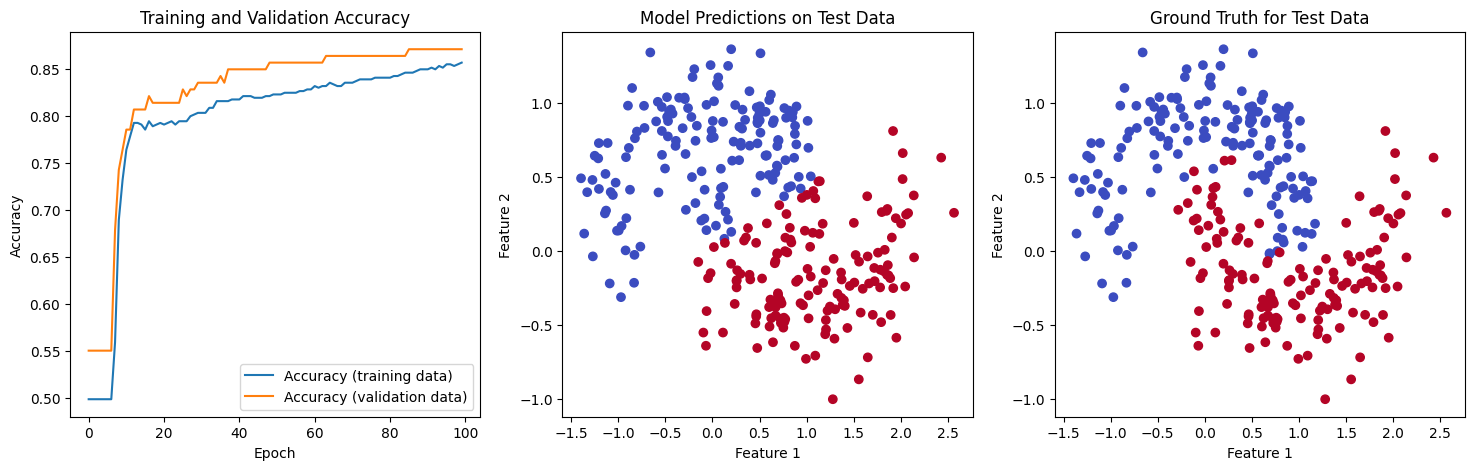

Test Loss: 0.0943
Test Accuracy: 0.8733



Activation Function: sigmoid, Loss Function: mean_absolute_error
10/10 [==============================] - 0s 1ms/step


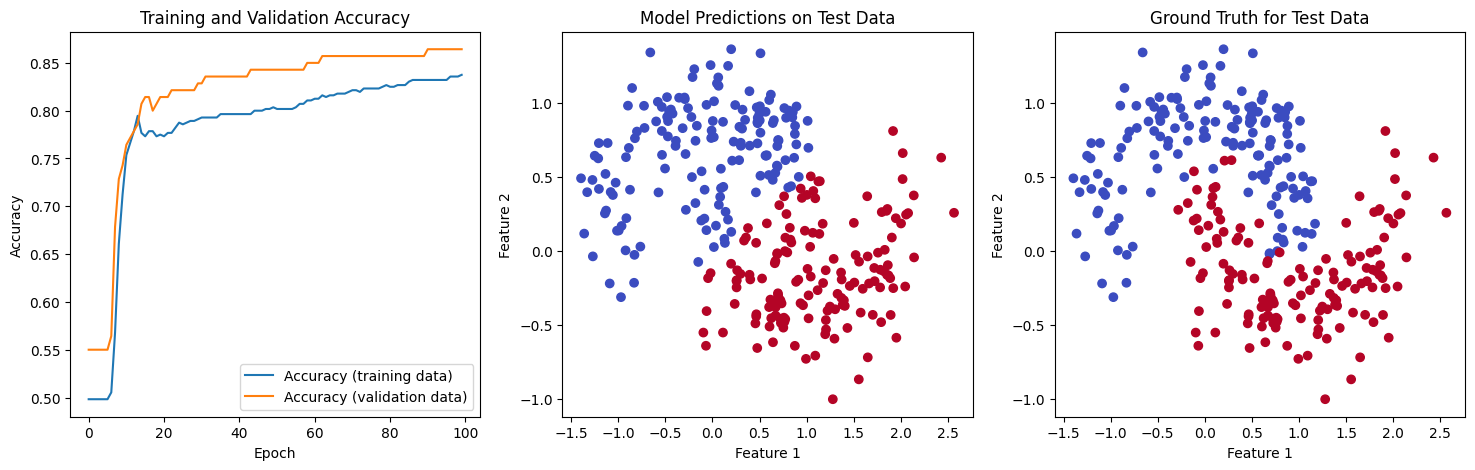

Test Loss: 0.1769
Test Accuracy: 0.8533



Activation Function: sigmoid, Loss Function: huber_loss
10/10 [==============================] - 0s 1ms/step


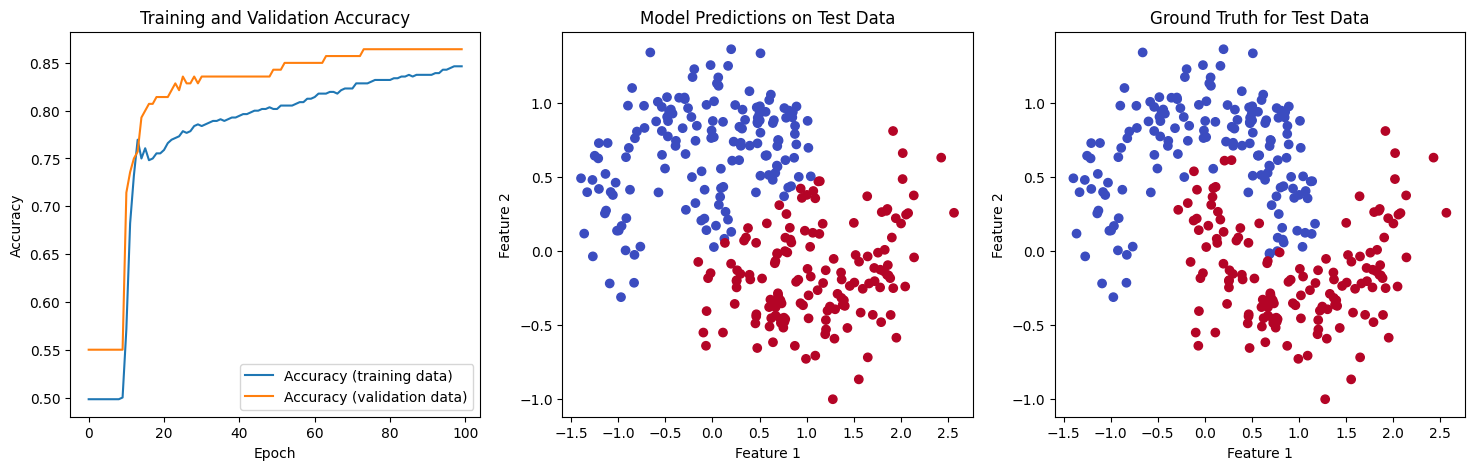

Test Loss: 0.0485
Test Accuracy: 0.8667





In [26]:
#loop through all combinations of activation and loss functions
for activation_function in activation_functions:
    for loss_function in loss_functions:
        print(f"Activation Function: {activation_function}, Loss Function: {loss_function}")
        model = build_model(activation_function=activation_function, loss_function=loss_function)
        train_and_evaluate_model(model, epochs=100)
        print("\n\n")